In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import make_interp_spline, BSpline

plt.style.use('seaborn')

In [2]:
columns = {
    'Q': 'Q (чел. / день)',
    'FC': 'FC (т.р. / год)',
    'VC': 'VC (т.р. / год)',
    'TC': 'TC (т.р. / год)',
    'MC': 'MC (т.р. / чел.)',
    'AFC': 'AFC (т.р. / чел.)',
    'AVC': 'AVC (т.р. / чел.)',
    'ATC': 'ATC (т.р. / чел.)',
}

data = {
    'Q': [1, 100, 200, 300, 400, 500],
    'FC': [1000, 1000, 1000, 1000, 1000, 1000],
    'VC': [0, 700, 1000, 1300, 1700, 2500],
}
data = pd.DataFrame(data)

data['TC'] = data['FC'] + data['VC']

d_TC = data['TC'][1:] - list(data['TC'][:-1])
d_Q = data['Q'][1:] - list(data['Q'][:-1])
MC = d_TC / d_Q
data['MC'] = ['-'] + [round(x, 3) for x in MC]

AFC = data['FC'][1:] / list(data['Q'][1:])
data['AFC'] = ['-'] + [round(x, 3) for x in AFC]

AVC = data['VC'][1:] / list(data['Q'][1:])
data['AVC'] = ['-'] + [round(x, 3) for x in AVC]

ATC = data['AFC'][1:] + list(data['AVC'][1:])
data['ATC'] = ['-'] + [round(x, 3) for x in ATC]

In [3]:
data

,Q,FC,VC,TC,MC,AFC,AVC,ATC
0,1,1000,0,1000,-,-,-,-
1,100,1000,700,1700,7.071,10.000,7.000,17.000
2,200,1000,1000,2000,3.000,5.000,5.000,10.000
3,300,1000,1300,2300,3.000,3.333,4.333,7.666
4,400,1000,1700,2700,4.000,2.500,4.250,6.750
5,500,1000,2500,3500,8.000,2.000,5.000,7.000


In [4]:
def interpolate(x, y):
    interpolator = make_interp_spline(x, y, k=2)
    x = np.linspace(min(x), max(x), 300)
    y = interpolator(x)
    return x, y

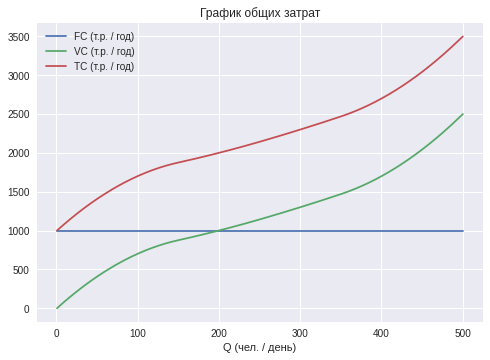

In [5]:
for costs in ['FC', 'VC', 'TC']:
    x = data['Q']
    y = data[costs]
    
    x, y = interpolate(x, y)
    
    plt.plot(x, y, label=columns[costs])
plt.legend()
plt.title('График общих затрат')
plt.xlabel(columns['Q'])
#plt.show()
plt.savefig('./common.png')

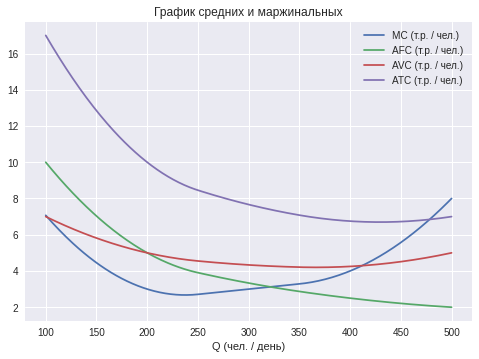

In [6]:
for costs in ['MC', 'AFC', 'AVC', 'ATC']:
    
    x = data['Q'][1:]
    y = data[costs][1:]
    
    x, y = interpolate(x, y)
    
    plt.plot(x, y, label=columns[costs])
plt.legend()
plt.title('График средних и маржинальных')
plt.xlabel(columns['Q'])
#plt.show()
plt.savefig('./averages.png')

In [8]:
data.columns = [columns[column] for column in data.columns]

In [9]:
data

,Q (чел. / день),FC (т.р. / год),VC (т.р. / год),TC (т.р. / год),MC (т.р. / чел.),AFC (т.р. / чел.),AVC (т.р. / чел.),ATC (т.р. / чел.)
0,1,1000,0,1000,-,-,-,-
1,100,1000,700,1700,7.071,10.000,7.000,17.000
2,200,1000,1000,2000,3.000,5.000,5.000,10.000
3,300,1000,1300,2300,3.000,3.333,4.333,7.666
4,400,1000,1700,2700,4.000,2.500,4.250,6.750
5,500,1000,2500,3500,8.000,2.000,5.000,7.000


In [170]:
data.to_markdown('./data.md', index=False)